<a href="https://colab.research.google.com/github/Shir095/BALC_2127839/blob/main/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ACTIVIDAD 9 - REDES NEURONALES
# BRYAN ALEJANDRO LARA CARRERA    2127839
# GRUPO: 008    HORA: N4

In [ ]:
# PASO 1 - CARGAR LIBRERÍAS
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, datasets, models

print(tf.__version__)

2.17.0


In [ ]:
# VIZUALIZANDO SET DE DATOS
keras.datasets.mnist.load_data(path="mnist.npz")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
# PASO 2 - CARGAR DATOS
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# PREPARAR CLASES
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco',
               'Seis', 'Siete', 'Ocho', 'Nueve']

In [ ]:
# EXPLORANDO IMÁGENES DE PRUEBA
x_test.shape

(10000, 28, 28)

In [ ]:
# EXPLORANDO IMÁGENES DE ENTRENAMIENTO
x_train.shape

(60000, 28, 28)

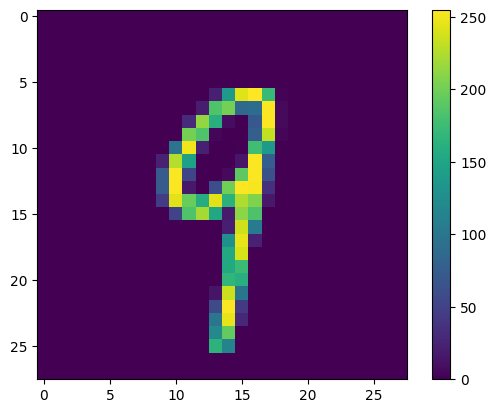

In [ ]:
# PASO 3 - PROCESAMIENTO DE DATOS
plt.figure()
plt.imshow(x_train[900])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# ESCALANDO VALORES DE IMÁGENES
x_train = x_train / 255.0
x_test = x_test / 255.0

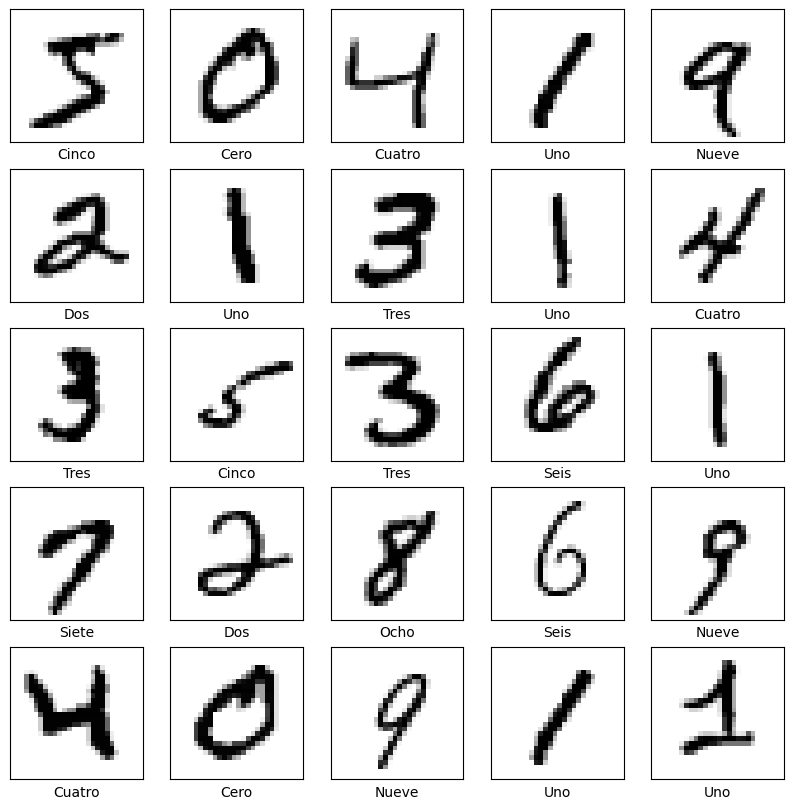

In [ ]:
# VISUALIZACIÓN DE LAS PRIMERAS 25 IMÁGENES

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    label_index = y_train[i]
    if 0 <= label_index < len(class_names):
        plt.xlabel(class_names[label_index])
    else:
        plt.xlabel(f"Unknown Label ({label_index})")
plt.show()

In [ ]:
# PASO 4 - SELECCIÓN Y ENTRENAMIENTO DEL MODELO
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# VISUALIZANDO LA ARQUITECTURA DEL MODELO
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# AGREGANDO CAPAS
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# ARQUITECTURA COMPLETA
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,322 (1.07 MB)

 Trainable params: 94,676 (369.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [ ]:
# COMPILANDO MODELO
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.9401 - loss: 0.2873 - val_accuracy: 0.9920 - val_loss: 0.0327
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.9970 - loss: 0.0107 - val_accuracy: 0.9862 - val_loss: 0.0500
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9978 - loss: 0.0071 - val_accuracy: 0.9916 - val_loss: 0.0336
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - accuracy: 0.9976 - loss: 0.0069 - val_accuracy: 0.9906 - val_loss: 0.0457
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9982 - loss: 0.0060 - val_accuracy: 0.9921 - val_loss: 0.0368
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9980 - loss: 0.0070 - val_accuracy: 0.9882 - val_loss: 0.0604
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 0.9859 - val_loss: 0.0688
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9978 -

313/313 - 4s - 13ms/step - accuracy: 0.9898 - loss: 0.0639


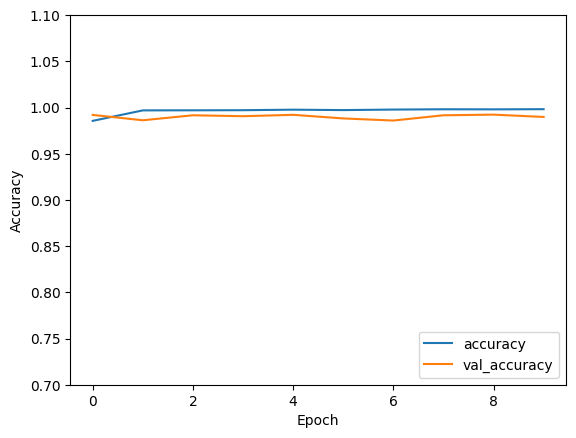

In [70]:
# EVALUANDO EL MODELO
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
# EVALUACIÓN DE EXACTITUD DE LA RED NEURONAL
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nExactitud del modelo en datos de prueba: {test_acc}")

313/313 - 5s - 16ms/step - accuracy: 0.9898 - loss: 0.0639

Exactitud del modelo en datos de prueba: 0.989799976348877


In [71]:
# PASO 5 - PRUEBA DEL MODELO
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


In [ ]:
# PRUEBA 1

In [72]:
# RESULTADOS DE LA IMÁGEN 100 (PROBABILIDADES DE LOS NÚMEROS QUE PUEDAN SER)
predictions[100]

array([4.7277908e-17, 1.7803366e-20, 1.1797961e-20, 1.5238224e-24,
       5.1701253e-18, 9.6500156e-16, 9.9999994e-01, 4.1118434e-23,
       1.7698743e-13, 2.7905967e-17], dtype=float32)

In [73]:
np.argmax(predictions[100])

6

In [74]:
# RESULTADOS DE LA IMÁGEN 100 (SEGÚ LA PROBABILIDAD, ¿QUÉ NÚMERO ES?)
y_test[100]

6

In [75]:
# FUNCIÓN PARA VISUALIZACIÓN DE IMÁGENES DE RESULTADO
def plot_image(i, predictions_array, y_test, img):
  predictions_array, true_label, img = predictions_array, y_test[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

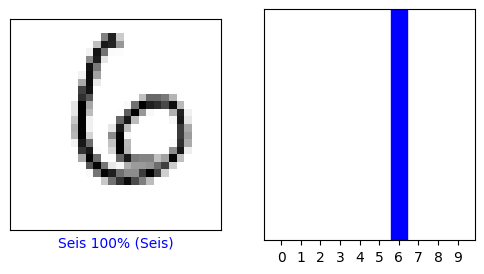

In [76]:
# RESULTADOS DE LA IMÁGEN 100 (VISUALIZACIÓN DE LA IMÁGEN Y RESULTADOS EN TABLAS)
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [ ]:
# PRUEBA 2

In [77]:
# RESULTADOS DE LA ÚLTIMA IMÁGEN (PROBABILIDADES DE LOS NÚMEROS QUE PUEDAN SER)
predictions[-1]

array([8.6552692e-12, 3.2389028e-17, 3.2306122e-16, 5.9966924e-19,
       1.5293600e-17, 2.0092826e-13, 9.9999994e-01, 4.1332711e-19,
       4.3944853e-15, 3.6779510e-13], dtype=float32)

In [78]:
np.argmax(predictions[-1])

6

In [79]:
# RESULTADOS DE LA ÚLTIMA IMÁGEN (SEGÚ LA PROBABILIDAD, ¿QUÉ NÚMERO ES?)
y_test[-1]

6

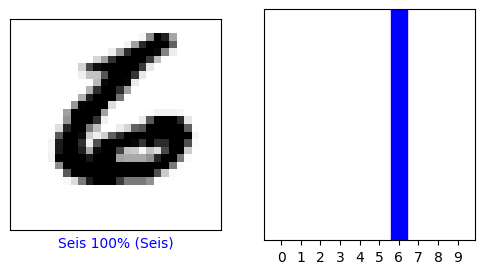

In [80]:
# RESULTADOS DE LA ÚLTIMA IMÁGEN (VISUALIZACIÓN DE LA IMÁGEN Y RESULTADOS EN TABLAS)
i = -1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [ ]:
# PRUEBA 3

In [81]:
# RESULTADOS DE LA PRIMER IMÁGEN (PROBABILIDADES DE LOS NÚMEROS QUE PUEDAN SER)
predictions[1]

array([1.03504297e-11, 1.74909948e-11, 9.99999940e-01, 8.95519570e-15,
       1.33489365e-17, 5.48267265e-20, 4.34165846e-14, 8.03992357e-14,
       9.63087596e-12, 6.84896365e-18], dtype=float32)

In [82]:
np.argmax(predictions[1])

2

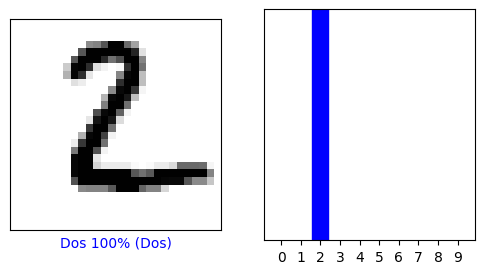

In [83]:
# RESULTADOS DE LA PRIMER IMÁGEN (VISUALIZACIÓN DE LA IMÁGEN Y RESULTADOS EN TABLAS)
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [ ]:
# PRUEBA 4

In [84]:
# RESULTADOS DE LA IMÁGEN 5000 (PROBABILIDADES DE LOS NÚMEROS QUE PUEDAN SER)
predictions[5000]

array([2.7970404e-12, 1.7359354e-10, 3.4949058e-11, 9.9999970e-01,
       1.4390765e-12, 2.3361916e-07, 6.4990734e-12, 2.7277874e-10,
       1.1973855e-09, 5.7357896e-10], dtype=float32)

In [85]:
np.argmax(predictions[5000])

3

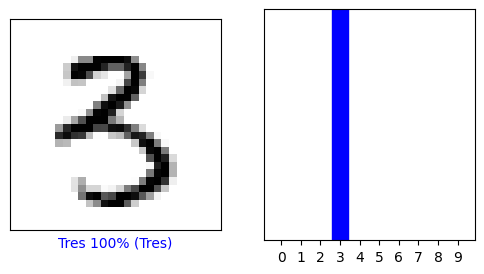

In [86]:
# RESULTADOS DE LA IMÁGEN 5000 (VISUALIZACIÓN DE LA IMÁGEN Y RESULTADOS EN TABLAS)
i = 5000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [ ]:
# PRUEBA 5

In [92]:
# RESULTADOS DE LA IMÁGEN 1358 (PROBABILIDADES DE LOS NÚMEROS QUE PUEDAN SER)
predictions[1358]

array([2.6328535e-09, 9.9999994e-01, 9.6128687e-09, 6.6245720e-10,
       3.6668002e-09, 2.8843912e-09, 1.0757065e-10, 3.7320479e-08,
       2.3630069e-09, 2.1862485e-10], dtype=float32)

In [91]:
np.argmax(predictions[1358])

1

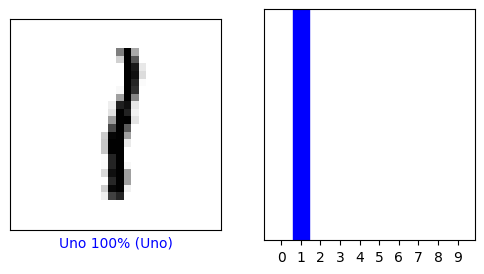

In [93]:
# RESULTADOS DE LA IMÁGEN 1358 (VISUALIZACIÓN DE LA IMÁGEN Y RESULTADOS EN TABLAS)
i = 1358
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [ ]:
# ¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?
# Se usaron la misma cantidad de épocas

In [ ]:
# ¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?
# Sin duda el mejor rendimiento se obtuvo con este modelo, ya que tiene una mejor estructura para las imágenes
# tiene una reducción de dimensionalidad eficiente, aprende características de jerarquía mas robustas
# además que se incluye una validación durante el entrenamiento.